'T_vs_Tb.png'

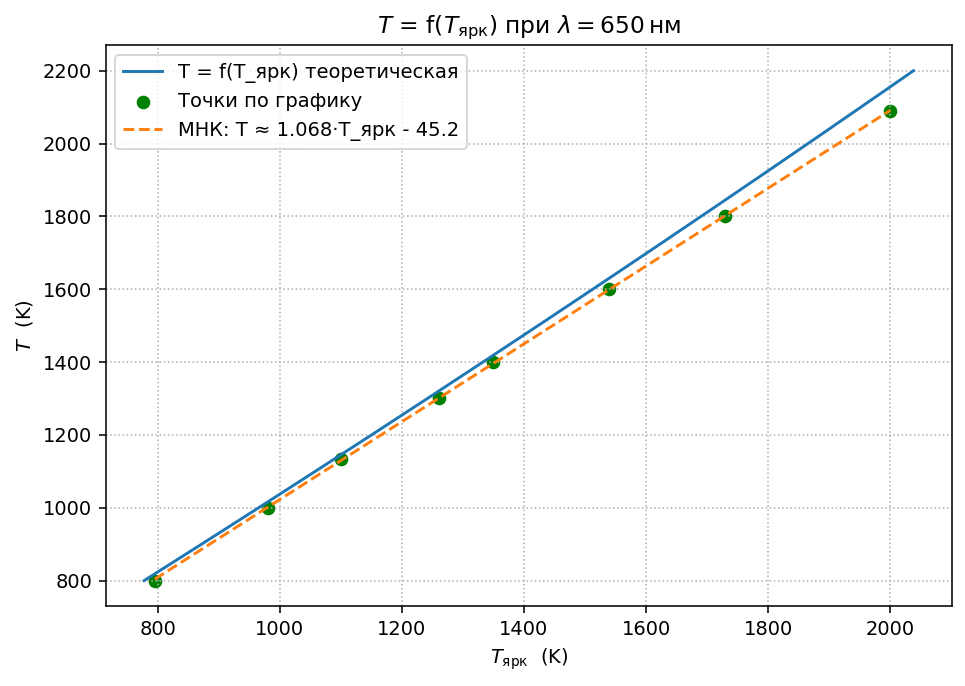

In [2]:
# -*- coding: utf-8 -*-
"""
График в координатах как в лабнике: T (истинная) по вертикали против T_ярк по горизонтали.
На том же графике строится прямая МНК по введённым точкам из учебника.

Как пользоваться:
1) Впишите свои точки (в КЕЛЬВИНАХ) в user_T_bright_K и user_T_true_K.
2) При желании задайте таблицу a_{λ,T}(T) для λ=650 нм через alpha_T_table_K и alpha_vals.
   Если не задавать — используется серое приближение a_const.
3) Запустите — получите:
   - сплошную кривую T(T_ярк) (точная связь через Планка; построена параметрически по T);
   - точки из учебника;
   - штриховую прямую МНК: T ≈ m*T_ярк + b.
Изображение сохраняется в /mnt/data/T_vs_Tb.png
"""

import numpy as np
import matplotlib.pyplot as plt

h   = 6.62607015e-34   # Дж*с
c   = 299792458.0      # м/с
k_B = 1.380649e-23     # Дж/К

lam = 650e-9  # м

user_T_bright_K = [1260, 1350, 795, 980, 2000, 1730, 1100, 1540]
user_T_true_K   = [1300, 1400, 800, 1000, 2090, 1800, 1135, 1600]


# --- Вариант 2 (опционально): табличная зависимость a_{λ,T}(T) на λ=650 нм с интерполяцией. ---
alpha_T_table_K = []  # например: [1600, 1800, 2000, 2200, 2400, 2600]
alpha_vals      = []  # например: [0.34, 0.36, 0.39, 0.41, 0.43, 0.45]

# --- Модель a_{λ,T}. Вариант 1: серое приближение (константа). ---
a_const = 0.45  

def alpha_of_T(T):
    """
    Возвращает a_{λ,T}.
    Если заданы alpha_T_table_K и alpha_vals (>=2 точки), использует интерполяцию, иначе — константа a_const.
    """
    T = np.asarray(T, dtype=float)
    if len(alpha_T_table_K) >= 2 and len(alpha_T_table_K) == len(alpha_vals):
        T_tab = np.asarray(alpha_T_table_K, dtype=float)
        a_tab = np.asarray(alpha_vals, dtype=float)
        return np.interp(T, T_tab, a_tab, left=a_tab[0], right=a_tab[-1])
    return np.full_like(T, a_const, dtype=float)

def T_bright_of_T(T):
    """
    Точная связь (из явной формулы):
    T_ярк(T) = (hc/(λ k_B)) / ln( 1 + (exp(hc/(λ k_B T)) - 1)/a_{λ,T} )
    """
    T = np.asarray(T, dtype=float)
    a = alpha_of_T(T)
    x = (h*c)/(lam*k_B*T)
    numerator = (h*c)/(lam*k_B)
    denom = np.log(np.exp(x)/a)  
    return numerator / denom

T_grid = np.linspace(800.0, 2200.0, 500)
Tb_grid = T_bright_of_T(T_grid)

# def T_bright_of_T(T):
#     """
#     Точная связь (из явной формулы):
#     T(T_ярк) = (hc/(λ k_B)) / ln( 1 + (exp(hc/(λ k_B T)) - 1)/a_{λ,T} )
#     """
#     T = np.asarray(T, dtype=float)
#     a = alpha_of_T(T)
#     x = (h*c)/(lam*k_B*T)
#     numerator = (h*c)/(lam*k_B)
#     denom = np.log1p(np.expm1(x)/a)  
#     return numerator / denom

order = np.argsort(Tb_grid)
Tb_sorted = Tb_grid[order]
T_sorted  = T_grid[order]

do_fit = False
if len(user_T_bright_K) >= 2 and len(user_T_bright_K) == len(user_T_true_K):
    x = np.asarray(user_T_bright_K, dtype=float)  # T_ярк
    y = np.asarray(user_T_true_K, dtype=float)    # T
    A = np.vstack([x, np.ones_like(x)]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]   # y = m x + b
    do_fit = True

plt.figure(figsize=(7, 5), dpi=140)

plt.plot(Tb_sorted, T_sorted, label="T = f(T_ярк) теоретическая")

if len(user_T_bright_K) >= 1 and len(user_T_bright_K) == len(user_T_true_K):
    plt.scatter(user_T_bright_K, user_T_true_K, c='green', marker='o', label="Точки по графику")

if do_fit:
    x_line = np.linspace(min(x), max(x), 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, linestyle='--', label=f"МНК: T ≈ {m:.3f}·T_ярк - {abs(b):.1f}")

plt.xlabel(r"$T_{\mathrm{ярк}}\ \ (\mathrm{K})$")
plt.ylabel(r"$T\ \ (\mathrm{K})$")
plt.title(r"$T$ = f($T_{\mathrm{ярк}}$) при $\lambda=650\,\mathrm{нм}$")
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()

out_path = "T_vs_Tb.png"
plt.savefig(out_path, bbox_inches='tight')
out_path


In [5]:
a_const = 0.62

'T_vs_Tb.png'

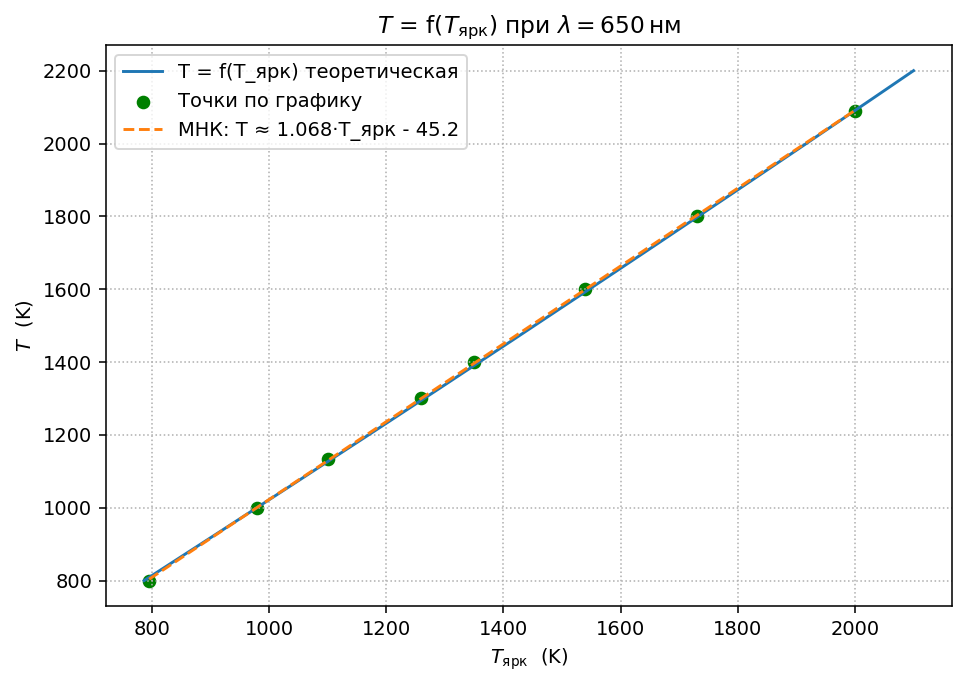

In [6]:

def alpha_of_T(T):
    """
    Возвращает a_{λ,T}.
    Если заданы alpha_T_table_K и alpha_vals (>=2 точки), использует интерполяцию, иначе — константа a_const.
    """
    T = np.asarray(T, dtype=float)
    if len(alpha_T_table_K) >= 2 and len(alpha_T_table_K) == len(alpha_vals):
        T_tab = np.asarray(alpha_T_table_K, dtype=float)
        a_tab = np.asarray(alpha_vals, dtype=float)
        return np.interp(T, T_tab, a_tab, left=a_tab[0], right=a_tab[-1])
    return np.full_like(T, a_const, dtype=float)

def T_bright_of_T(T):
    """
    Точная связь (из явной формулы):
    T_ярк(T) = (hc/(λ k_B)) / ln( 1 + (exp(hc/(λ k_B T)) - 1)/a_{λ,T} )
    """
    T = np.asarray(T, dtype=float)
    a = alpha_of_T(T)
    x = (h*c)/(lam*k_B*T)
    numerator = (h*c)/(lam*k_B)
    denom = np.log(np.exp(x)/a)  
    return numerator / denom

T_grid = np.linspace(800.0, 2200.0, 500)
Tb_grid = T_bright_of_T(T_grid)

# def T_bright_of_T(T):
#     """
#     Точная связь (из явной формулы):
#     T(T_ярк) = (hc/(λ k_B)) / ln( 1 + (exp(hc/(λ k_B T)) - 1)/a_{λ,T} )
#     """
#     T = np.asarray(T, dtype=float)
#     a = alpha_of_T(T)
#     x = (h*c)/(lam*k_B*T)
#     numerator = (h*c)/(lam*k_B)
#     denom = np.log1p(np.expm1(x)/a)  
#     return numerator / denom

order = np.argsort(Tb_grid)
Tb_sorted = Tb_grid[order]
T_sorted  = T_grid[order]

do_fit = False
if len(user_T_bright_K) >= 2 and len(user_T_bright_K) == len(user_T_true_K):
    x = np.asarray(user_T_bright_K, dtype=float)  # T_ярк
    y = np.asarray(user_T_true_K, dtype=float)    # T
    A = np.vstack([x, np.ones_like(x)]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]   # y = m x + b
    do_fit = True

plt.figure(figsize=(7, 5), dpi=140)

plt.plot(Tb_sorted, T_sorted, label="T = f(T_ярк) теоретическая")

if len(user_T_bright_K) >= 1 and len(user_T_bright_K) == len(user_T_true_K):
    plt.scatter(user_T_bright_K, user_T_true_K, c='green', marker='o', label="Точки по графику")

if do_fit:
    x_line = np.linspace(min(x), max(x), 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, linestyle='--', label=f"МНК: T ≈ {m:.3f}·T_ярк - {abs(b):.1f}")

plt.xlabel(r"$T_{\mathrm{ярк}}\ \ (\mathrm{K})$")
plt.ylabel(r"$T\ \ (\mathrm{K})$")
plt.title(r"$T$ = f($T_{\mathrm{ярк}}$) при $\lambda=650\,\mathrm{нм}$")
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()

out_path = "T_vs_Tb.png"
plt.savefig(out_path, bbox_inches='tight')
out_path



Лучшая модель по AIC: quadratic
Линейная:  \varepsilon_T(T) \approx (-0.051077) + (1.520879e-04)\,T
  R^2=0.99745, RMSE=0.002879, AIC=-148.107
Квадратичная: \varepsilon_T(T) \approx (-0.080168) + (1.968432e-04)\,T + (-1.598402e-08)\,T^2
  R^2=0.99866, RMSE=0.002087, AIC=-154.476
Файл графика: eps_T_fit.png
CSV с таблицей: eps_T_fit.csv



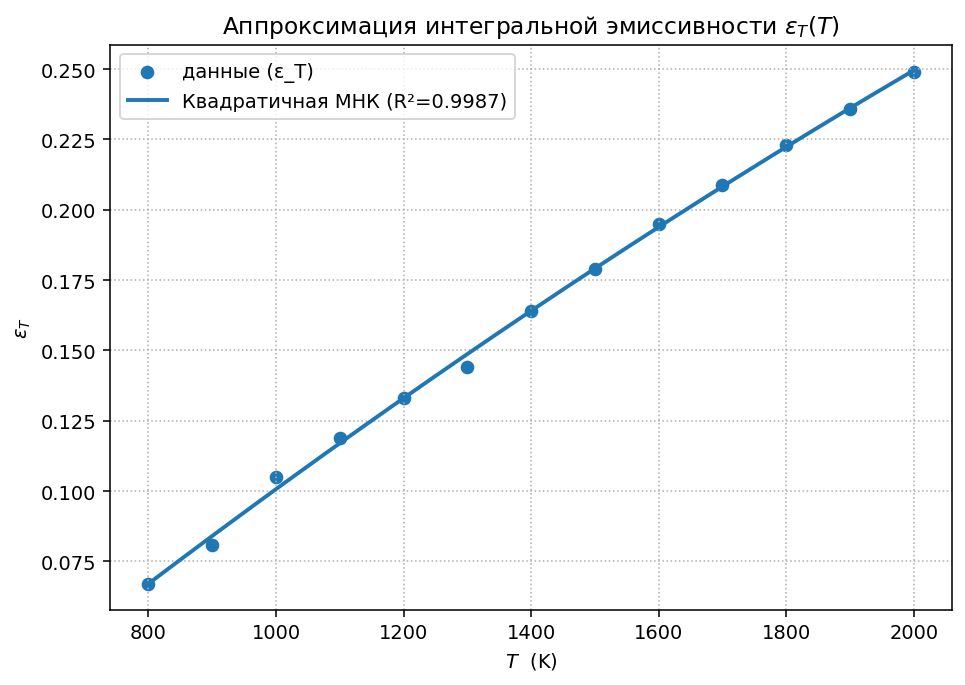

In [8]:
# -*- coding: utf-8 -*-
"""
Аппроксимация функции ε_T(T) по табличным данным из лабника.
- Линейная и квадратичная аппроксимации (МНК).
- Метрики (R^2, RMSE, AIC), выбор модели.
- График и CSV с результатами.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---- Данные ----
T = np.array([800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], dtype=float)
eps_lambda = np.array([0.460, 0.458, 0.456, 0.454, 0.452, 0.450, 0.448, 0.446, 0.443, 0.441, 0.439, 0.437, 0.435], dtype=float)
eps_T = np.array([0.067, 0.081, 0.105, 0.119, 0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.223, 0.236, 0.249], dtype=float)

# ---- Метрики ----
def metrics(y_true, y_pred, k_params):
    n = y_true.size
    resid = y_true - y_pred
    rss = np.sum(resid**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - rss / tss
    rmse = np.sqrt(rss / n)
    aic = n * np.log(rss / n) + 2 * k_params
    return {"R2": r2, "RMSE": rmse, "AIC": aic, "RSS": rss}

# ---- Линейная и квадратичная подгонки ----
coef_lin = np.polyfit(T, eps_T, deg=1)
y_lin = np.polyval(coef_lin, T)
m_lin = metrics(eps_T, y_lin, k_params=2)

coef_quad = np.polyfit(T, eps_T, deg=2)
y_quad = np.polyval(coef_quad, T)
m_quad = metrics(eps_T, y_quad, k_params=3)

# ---- Выбор модели по AIC ----
best_model_name = "linear"
best_coef = coef_lin
best_pred = y_lin
best_metrics = m_lin
if m_quad["AIC"] + 2 < m_lin["AIC"]:
    best_model_name = "quadratic"
    best_coef = coef_quad
    best_pred = y_quad
    best_metrics = m_quad

# ---- Формулы LaTeX ----
latex_lin = fr"\varepsilon_T(T) \approx ({coef_lin[1]:.6f}) + ({coef_lin[0]:.6e})\,T"
latex_quad = fr"\varepsilon_T(T) \approx ({coef_quad[2]:.6f}) + ({coef_quad[1]:.6e})\,T + ({coef_quad[0]:.6e})\,T^2"

# ---- График ----
plt.figure(figsize=(7,5), dpi=140)
plt.scatter(T, eps_T, label="данные (ε_T)", marker="o")
T_plot = np.linspace(T.min(), T.max(), 400)
if best_model_name == "linear":
    y_plot = np.polyval(coef_lin, T_plot)
    label_fit = f"Линейная МНК (R²={m_lin['R2']:.4f})"
else:
    y_plot = np.polyval(coef_quad, T_plot)
    label_fit = f"Квадратичная МНК (R²={m_quad['R2']:.4f})"
plt.plot(T_plot, y_plot, label=label_fit, linewidth=2)

plt.xlabel(r"$T\ \ (\mathrm{K})$")
plt.ylabel(r"$\varepsilon_T$")
plt.title(r"Аппроксимация интегральной эмиссивности $\varepsilon_T(T)$")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
png_path = "eps_T_fit.png"
plt.savefig(png_path, bbox_inches="tight")

# ---- Таблица и CSV ----
df = pd.DataFrame({
    "T_K": T,
    "eps_T_data": eps_T,
    "eps_T_fit_linear": y_lin,
    "eps_T_fit_quadratic": y_quad,
    "resid_linear": eps_T - y_lin,
    "resid_quadratic": eps_T - y_quad
})

csv_path = "eps_T_fit.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")

# ---- Отчёт ----
report = f"""
Лучшая модель по AIC: {best_model_name}
Линейная:  {latex_lin}
  R^2={m_lin['R2']:.5f}, RMSE={m_lin['RMSE']:.6f}, AIC={m_lin['AIC']:.3f}
Квадратичная: {latex_quad}
  R^2={m_quad['R2']:.5f}, RMSE={m_quad['RMSE']:.6f}, AIC={m_quad['AIC']:.3f}
Файл графика: {png_path}
CSV с таблицей: {csv_path}
"""
print(report)
